# Analyzing Joe Biden's and Donald Trump's tweets during the coronavirus pandemic.

# Table of Contents

* [1. Importing Packages](#importing_packages)
* [2. Loading the Data](#load_data)
* [3. Data Cleaning and Preparation](#data_clean)
* [4. Exploring the Data: Aggregate and Frequency statistics](#explore_data)
* [5. Sentiment Analysis](#sentiment_analysis)
* [6. Topic Modeling](#topic_modeling)
* [7. Classification](#classification)

# 1. Importing packages <a class="anchor" id="importing_packages">

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import everygrams
from nltk import ngrams
from nltk import FreqDist
from nltk.tokenize.treebank import TreebankWordDetokenizer
from textblob import TextBlob
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm, metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. Load Data<a class="anchor" id="load_data">

In [2]:
trump_df = pd.read_csv("trump.csv")
biden_df = pd.read_csv("biden.csv")

In [3]:
trump_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,I am deeply saddened by the loss of my friend ...,07-22-2020 22:46:27,24836,126563,False,1286070129965649922
1,We MUST protect our National Parks for our chi...,07-22-2020 19:32:42,31289,155074,False,1286021372070830084
2,Mail-In Voting unless changed by the courts wi...,07-21-2020 11:41:10,45537,172449,False,1285540318503407622
3,Strong Stock Market Numbers. You want to see t...,07-21-2020 11:33:05,30439,147781,False,1285538283892748288
4,“In my view General Flynn should never have be...,07-21-2020 10:48:12,21231,90140,False,1285526989667958784
...,...,...,...,...,...,...
5181,I will be signing our very large and comprehen...,12-31-2019 14:16:40,22730,95208,False,1212014713808273410
5182,President Putin of Russia called to thank me a...,12-31-2019 14:06:09,29025,141918,False,1212012065440894976
5183,Armed congregants quickly stopped a crazed chu...,12-31-2019 13:53:10,25719,114701,False,1212008798849814528
5184,Iran killed an American contractor wounding ma...,12-31-2019 12:02:47,37287,150318,False,1211981022084128768


In [4]:
biden_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Donald Trump’s own staff admits that he fails ...,2020-07-24 00:30:00,4867,19073,False,1286458575150370817
1,We need a president who listens to someone oth...,2020-07-23 23:15:00,15827,110536,False,1286439700958453763
2,This was preventable. https://t.co/NWaHXW8U4K,2020-07-23 22:10:00,12336,56418,False,1286423343135182848
3,"Out of every trial and tribulation, we've alwa...",2020-07-23 21:40:00,4158,12282,False,1286415793245347845
4,"Hey @Phillies, here’s to hoping we both win bi...",2020-07-23 20:05:00,4914,35253,False,1286391885993373696
...,...,...,...,...,...,...
3087,President Trump’s ICE raids are inhumane. His ...,2019-07-13 20:55:00,3886,19173,False,1150146631569989633
3088,I’m heartbroken to hear of the passing of Héct...,2019-07-13 19:55:00,200,1299,False,1150131532092383232
3089,Had the opportunity to spend some time with th...,2019-07-13 19:19:12,167,885,False,1150122523075457025
3090,"As individuals, and as a nation, we have to pr...",2019-07-13 17:13:00,520,2076,False,1150090763214004224


# 3. Data Cleaning and Preparation<a class="anchor" id="data_clean">

### Functions for text cleaning

In [5]:
global stop_words
stop_words = stopwords.words('english')
custom_stopwords = ['amp', 'youre', 'dont','wont', 'got']
stop_words.extend(custom_stopwords)

def detect_language(X):
    from langdetect import detect
    try:
        lang = detect(X)
        return(lang)
    except:
        return("other")
    
def remove_url_punctuation(X):
    """ Replace URLS, punctuations, hashtags found in a text string with nothing.
    Change to lowercase"""
    # Try with just simple /w+ regex.       
    url_pattern = re.compile(r'https:?://\S+|www\.\S+')
    replace_url = url_pattern.sub(r'', str(X))
    punct_pattern = re.compile(r'[^\w\s]')
    no_punct = punct_pattern.sub(r'', replace_url).lower()
    no_punct = no_punct.replace('\n', ' ')
    no_punct = no_punct.replace('\t', ' ')
    return no_punct

def split_words(X):
    """"" Split tweets into words for NLP"""
    split_word_list = X.split(" ")
    return split_word_list

def remove_stopwords(X):
    filtered_words = []
    global stop_words
    for word in X:
        if word not in stop_words and len(word) > 2 and word != 'nan':
            filtered_words.append(word)
    return filtered_words

# All the above in one function
def basic_processing(text):
    clean_text = remove_url_punctuation(text)
    tokens = split_words(clean_text)
    tokens = remove_stopwords(tokens) 
    return tokens

### Get Biden tweets since the emergence of [COVID19](https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200121-sitrep-1-2019-ncov.pdf). Trump dataset already filtered by start date. 

In [6]:
START_DATE = pd.to_datetime('31-12-2019')
biden_df['created_at'] = pd.to_datetime(biden_df['created_at'])
trump_df['created_at'] = pd.to_datetime(trump_df['created_at'])
biden_df = biden_df.loc[biden_df['created_at'] >= START_DATE]
biden_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Donald Trump’s own staff admits that he fails ...,2020-07-24 00:30:00,4867,19073,False,1286458575150370817
1,We need a president who listens to someone oth...,2020-07-23 23:15:00,15827,110536,False,1286439700958453763
2,This was preventable. https://t.co/NWaHXW8U4K,2020-07-23 22:10:00,12336,56418,False,1286423343135182848
3,"Out of every trial and tribulation, we've alwa...",2020-07-23 21:40:00,4158,12282,False,1286415793245347845
4,"Hey @Phillies, here’s to hoping we both win bi...",2020-07-23 20:05:00,4914,35253,False,1286391885993373696
...,...,...,...,...,...,...
1706,"As we move into the New Year, there's one thin...",2019-12-31 23:30:00,7949,66898,False,1212153964206198789
1707,2019 was a year of record violence — it will b...,2019-12-31 22:02:37,986,3552,False,1212131972295929856
1708,Next year could give us one of two things: a n...,2019-12-31 20:45:00,470,1779,False,1212112439623458826
1709,It will take years to repair the damage Betsy ...,2019-12-31 17:15:00,6375,24950,False,1212059591569297408


### Retain English tweets

In [7]:
trump_df['en'] = trump_df['text'].apply(detect_language)
biden_df['en'] = biden_df['text'].apply(detect_language)

trump_df = trump_df[trump_df['en'] == 'en']
biden_df = biden_df[biden_df['en'] == 'en']

### Remove punctuation, special characters, and hashtags in tweets

In [8]:
trump_df['clean_text'] = trump_df['text'].apply(remove_url_punctuation)
biden_df['clean_text'] = biden_df['text'].apply(remove_url_punctuation)
print(trump_df['text'].head())
print('-------------------------------------')
print(trump_df['clean_text'].head())

0    I am deeply saddened by the loss of my friend ...
1    We MUST protect our National Parks for our chi...
2    Mail-In Voting unless changed by the courts wi...
3    Strong Stock Market Numbers. You want to see t...
4    “In my view General Flynn should never have be...
Name: text, dtype: object
-------------------------------------
0    i am deeply saddened by the loss of my friend ...
1    we must protect our national parks for our chi...
2    mailin voting unless changed by the courts wil...
3    strong stock market numbers you want to see th...
4    in my view general flynn should never have bee...
Name: clean_text, dtype: object


### Tokenize Tweets

In [9]:
trump_df['tokens'] = trump_df['clean_text'].apply(split_words)
biden_df['tokens'] = biden_df['clean_text'].apply(split_words)
print(trump_df['clean_text'].head())
print('-------------------------------------')
print(trump_df['tokens'].head())

0    i am deeply saddened by the loss of my friend ...
1    we must protect our national parks for our chi...
2    mailin voting unless changed by the courts wil...
3    strong stock market numbers you want to see th...
4    in my view general flynn should never have bee...
Name: clean_text, dtype: object
-------------------------------------
0    [i, am, deeply, saddened, by, the, loss, of, m...
1    [we, must, protect, our, national, parks, for,...
2    [mailin, voting, unless, changed, by, the, cou...
3    [strong, stock, market, numbers, you, want, to...
4    [in, my, view, general, flynn, should, never, ...
Name: tokens, dtype: object


### Remove Stop Words with NLTK

In [10]:
trump_df['tokens'] = trump_df['tokens'].apply(remove_stopwords)
biden_df['tokens'] = biden_df['tokens'].apply(remove_stopwords)
print(trump_df['tokens'].head())

0    [deeply, saddened, loss, friend, charles, ever...
1    [must, protect, national, parks, children, gra...
2    [mailin, voting, unless, changed, courts, lead...
3    [strong, stock, market, numbers, want, see, di...
4    [view, general, flynn, never, prosecuted, firs...
Name: tokens, dtype: object


# 4. Exploring the Data: Aggregate and Frequency Statistics<a class="anchor" id="explore_data">

In [11]:
trump_df.describe()

,retweet_count,favorite_count,id_str
count,4615.000000,4615.000000,4.615000e+03
mean,17955.441170,57645.367714,1.243055e+18
std,15411.695913,80936.116430,1.897700e+16
min,0.000000,0.000000,1.211969e+18
25%,7740.500000,0.000000,1.226120e+18
50%,13357.000000,28526.000000,1.241662e+18
75%,23630.500000,93904.500000,1.257781e+18
max,225693.000000,830795.000000,1.286070e+18


In [12]:
biden_df.describe()

,retweet_count,favorite_count,id_str
count,1676.000000,1.676000e+03,1.676000e+03
mean,8384.615155,4.069876e+04,1.248493e+18
std,12698.710369,6.848496e+04,2.030649e+16
min,11.000000,3.400000e+01,1.211809e+18
25%,1913.000000,7.488750e+03,1.232108e+18
50%,4777.500000,1.982500e+04,1.247396e+18
75%,10714.500000,4.830775e+04,1.265036e+18
max,333504.000000,1.662229e+06,1.286459e+18


## How engaging are their tweets?: Viewing the average number of retweets and favorites. 

#### Trump

In [13]:
trump_rt_avg = trump_df.mean()['retweet_count']
print("Trump retweet average:", trump_rt_avg)

Trump retweet average: 17955.441170097507


In [14]:
trump_favorite_avg = trump_df.mean()['favorite_count']
print("Trump favorite average:", trump_favorite_avg)

Trump favorite average: 57645.367713976164


In [15]:
trump_most_rts = trump_df.loc[trump_df['retweet_count'].idxmax()].text
print("Trump's most retweeted and favorited tweet:", trump_most_rts)

Trump's most retweeted and favorited tweet: The United States of America will be designating ANTIFA as a Terrorist Organization.


#### Biden

In [16]:
biden_rt_avg = biden_df.mean()['retweet_count']
print("Biden retweet average:", biden_rt_avg)

Biden retweet average: 8384.615155131265


In [17]:
biden_favorite_avg = biden_df.mean()['favorite_count']
print("Biden favorite average:", biden_favorite_avg)

Biden favorite average: 40698.75715990453


In [18]:
biden_most_rts = biden_df.loc[biden_df['retweet_count'].idxmax()].text
print("Biden's most retweeted and favorited tweet:", biden_most_rts)

Biden's most retweeted and favorited tweet: I can’t believe I have to say this, but please don’t drink bleach.


In [19]:
# Calculate how much more retweets and favorites trump gets on average than Biden
print("Trump gets", round(trump_rt_avg / biden_rt_avg, 2), "times more retweets than Biden." )
print("That's an increase of", round(100 * (trump_rt_avg - biden_rt_avg) / biden_rt_avg, 2) ,"%")

Trump gets 2.14 times more retweets than Biden.
That's an increase of 114.15 %


In [20]:
print("Trump gets", round(trump_favorite_avg / biden_favorite_avg, 2), "times more favorites than Biden." )
print("That's an increase of", round(100 * (trump_favorite_avg - biden_favorite_avg) / biden_favorite_avg, 2) ,"%")

Trump gets 1.42 times more favorites than Biden.
That's an increase of 41.64 %


## Looks like Trump gets much more retweets and favorites than Biden. Let's use boxplots to visualize the differences more clearly. 

C:\Users\david\anaconda3\envs\PythonCPU\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Trump vs Biden Retweets')

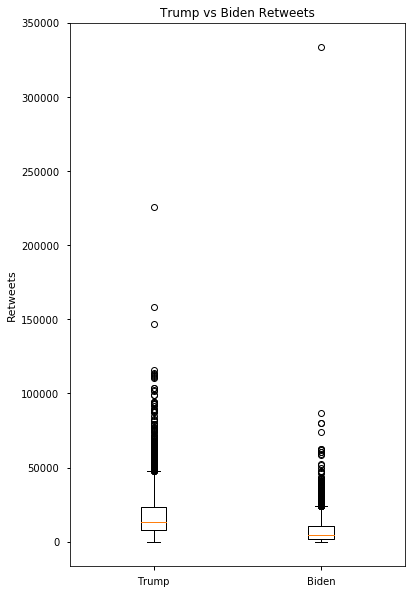

In [21]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(6, 10))
plt.boxplot([trump_df['retweet_count'], biden_df['retweet_count']], labels=['Trump', 'Biden'], autorange=False)

plt.ylabel('Retweets')
plt.title('Trump vs Biden Retweets')

C:\Users\david\anaconda3\envs\PythonCPU\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Trump vs Biden Favorites')

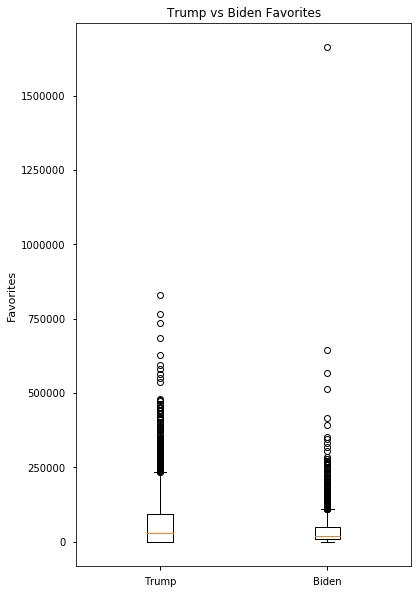

In [22]:
plt.figure(figsize=(6, 10))
plt.boxplot([trump_df['favorite_count'], biden_df['favorite_count']], labels=['Trump', 'Biden'], autorange=False)
plt.ylabel('Favorites')
plt.title('Trump vs Biden Favorites')

## Which words and n-grams do they use the most?

### Unigrams

In [23]:
trump_tokens = trump_df['tokens'].explode()
biden_tokens = biden_df['tokens'].explode()

trump_unigrams = FreqDist(ngrams(trump_tokens, 1))
biden_unigrams = FreqDist(ngrams(biden_tokens, 1))

[(('great',), 700),
 (('realdonaldtrump',), 526),
 (('president',), 499),
 (('people',), 408),
 (('thank',), 340),
 (('trump',), 335),
 (('democrats',), 310),
 (('news',), 309),
 (('new',), 271),
 (('coronavirus',), 255),
 (('fake',), 242),
 (('american',), 223),
 (('house',), 219),
 (('big',), 213),
 (('get',), 203),
 (('never',), 200),
 (('would',), 197),
 (('whitehouse',), 196),
 (('impeachment',), 195),
 (('like',), 189)]

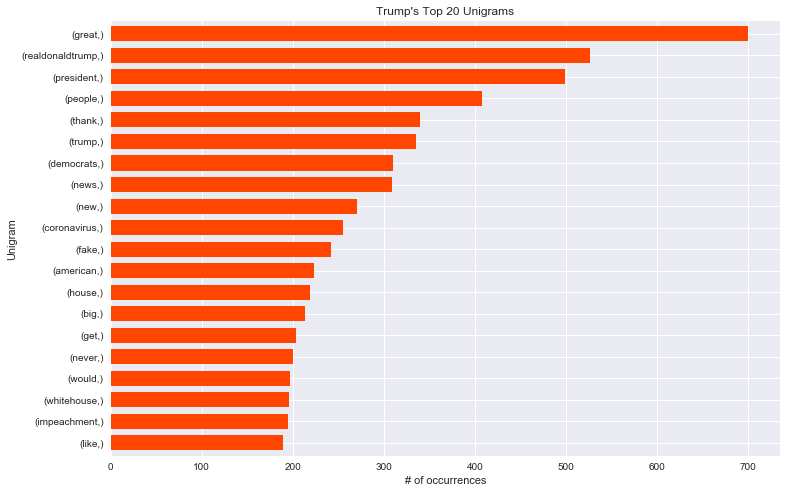

In [24]:
plt.style.use('seaborn')
NUM_NGRAMS = 20

pd.Series(ngrams(trump_tokens, 1)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Unigrams")
plt.ylabel('Unigram')
plt.xlabel('# of occurrences')
trump_unigrams.most_common(NUM_NGRAMS)

[(('trump',), 463),
 (('donald',), 399),
 (('president',), 390),
 (('need',), 317),
 (('nation',), 213),
 (('one',), 208),
 (('people',), 193),
 (('american',), 192),
 (('every',), 181),
 (('country',), 180),
 (('crisis',), 174),
 (('get',), 173),
 (('together',), 158),
 (('make',), 157),
 (('health',), 151),
 (('day',), 149),
 (('time',), 142),
 (('today',), 139),
 (('care',), 132),
 (('help',), 131)]

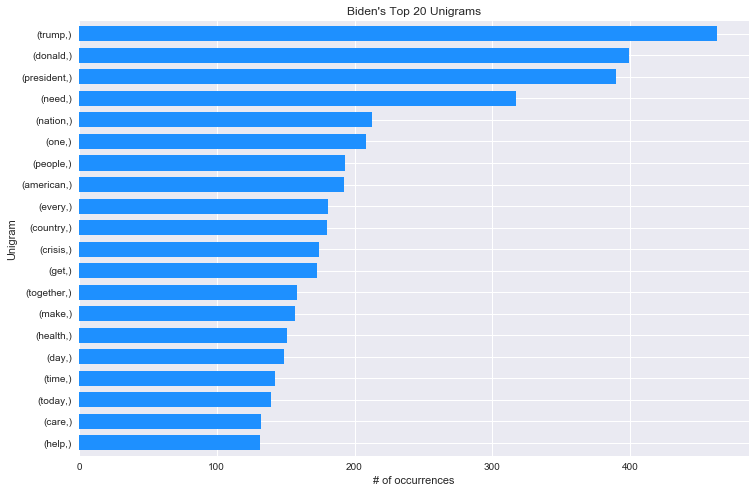

In [25]:
pd.Series(ngrams(biden_tokens, 1)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 Unigrams")
plt.ylabel('Unigram')
plt.xlabel('# of occurrences')
biden_unigrams.most_common(NUM_NGRAMS)

### Bigrams

In [26]:
trump_bigrams = FreqDist(ngrams(trump_tokens, 2))
biden_bigrams = FreqDist(ngrams(biden_tokens, 2))

[(('fake', 'news'), 186),
 (('president', 'realdonaldtrump'), 131),
 (('complete', 'total'), 115),
 (('total', 'endorsement'), 114),
 (('white', 'house'), 93),
 (('president', 'trump'), 92),
 (('united', 'states'), 85),
 (('joe', 'biden'), 76),
 (('radical', 'left'), 73),
 (('new', 'york'), 72),
 (('second', 'amendment'), 67),
 (('great', 'state'), 65),
 (('republican', 'party'), 63),
 (('great', 'job'), 62),
 (('military', 'vets'), 62),
 (('sleepy', 'joe'), 61),
 (('mini', 'mike'), 57),
 (('american', 'people'), 52),
 (('nothing', 'democrats'), 51),
 (('small', 'businesses'), 50)]

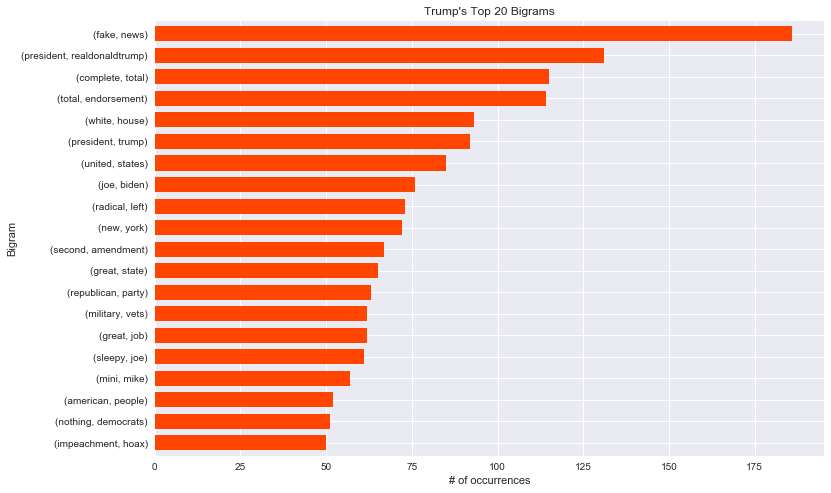

In [27]:
pd.Series(ngrams(trump_tokens, 2)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Bigrams")
plt.ylabel('Bigram')
plt.xlabel('# of occurrences')
trump_bigrams.most_common(NUM_NGRAMS)

[(('donald', 'trump'), 345),
 (('health', 'care'), 87),
 (('white', 'house'), 80),
 (('american', 'people'), 70),
 (('need', 'president'), 60),
 (('donald', 'trumps'), 53),
 (('president', 'trump'), 50),
 (('soul', 'nation'), 49),
 (('need', 'help'), 47),
 (('every', 'day'), 42),
 (('beat', 'donald'), 42),
 (('across', 'country'), 33),
 (('make', 'sure'), 30),
 (('battle', 'soul'), 30),
 (('climate', 'change'), 30),
 (('front', 'lines'), 30),
 (('south', 'carolina'), 29),
 (('public', 'health'), 27),
 (('four', 'years'), 27),
 (('come', 'together'), 26)]

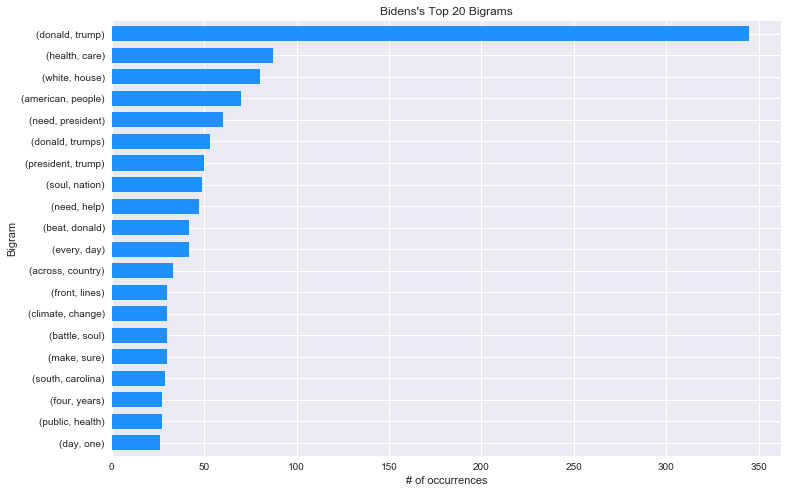

In [28]:
# Plotting
pd.Series(ngrams(biden_tokens, 2)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Bidens's Top 20 Bigrams")
plt.ylabel('Bigram')
plt.xlabel('# of occurrences')
biden_bigrams.most_common(NUM_NGRAMS)

### Trigrams

In [29]:
trump_trigrams = FreqDist(ngrams(trump_tokens, 3))
biden_trigrams = FreqDist(ngrams(biden_tokens, 3))

[(('complete', 'total', 'endorsement'), 113),
 (('coronavirus', 'task', 'force'), 37),
 (('whitehouse', 'president', 'realdonaldtrump'), 32),
 (('fake', 'news', 'media'), 29),
 (('approval', 'rating', 'republican'), 28),
 (('rating', 'republican', 'party'), 28),
 (('whitehouse', 'live', 'press'), 27),
 (('live', 'press', 'briefing'), 27),
 (('press', 'briefing', 'coronavirus'), 27),
 (('briefing', 'coronavirus', 'task'), 27),
 (('fake', 'news', 'cnn'), 25),
 (('loves', 'military', 'vets'), 25),
 (('radical', 'left', 'nothing'), 24),
 (('sleepy', 'joe', 'biden'), 23),
 (('left', 'nothing', 'democrats'), 23),
 (('mini', 'mike', 'bloomberg'), 21),
 (('supporter', 'maga', 'agenda'), 20),
 (('republican', 'party', 'thank'), 17),
 (('keep', 'america', 'great'), 17),
 (('make', 'america', 'great'), 16)]

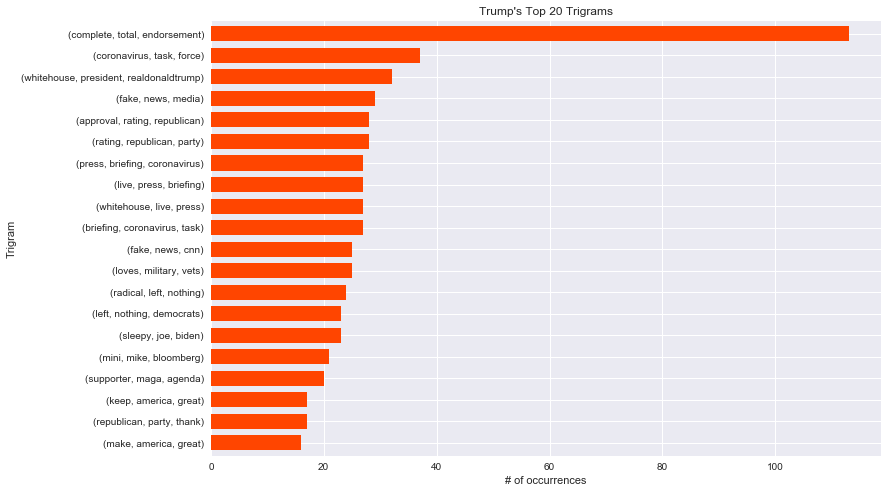

In [30]:
pd.Series(ngrams(trump_tokens, 3)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Trigrams")
plt.ylabel('Trigram')
plt.xlabel('# of occurrences')
trump_trigrams.most_common(NUM_NGRAMS)

[(('beat', 'donald', 'trump'), 41),
 (('battle', 'soul', 'nation'), 30),
 (('defeat', 'donald', 'trump'), 21),
 (('trump', 'white', 'house'), 20),
 (('keep', 'momentum', 'going'), 20),
 (('health', 'care', 'workers'), 18),
 (('gun', 'violence', 'epidemic'), 17),
 (('donald', 'trump', 'white'), 16),
 (('end', 'gun', 'violence'), 16),
 (('tune', 'watch', 'live'), 16),
 (('make', 'voice', 'heard'), 15),
 (('front', 'lines', 'crisis'), 14),
 (('restore', 'soul', 'nation'), 14),
 (('every', 'single', 'day'), 13),
 (('four', 'years', 'donald'), 13),
 (('front', 'lines', 'fight'), 13),
 (('get', 'donald', 'trump'), 13),
 (('get', 'white', 'house'), 13),
 (('public', 'health', 'crisis'), 12),
 (('american', 'people', 'deserve'), 12)]

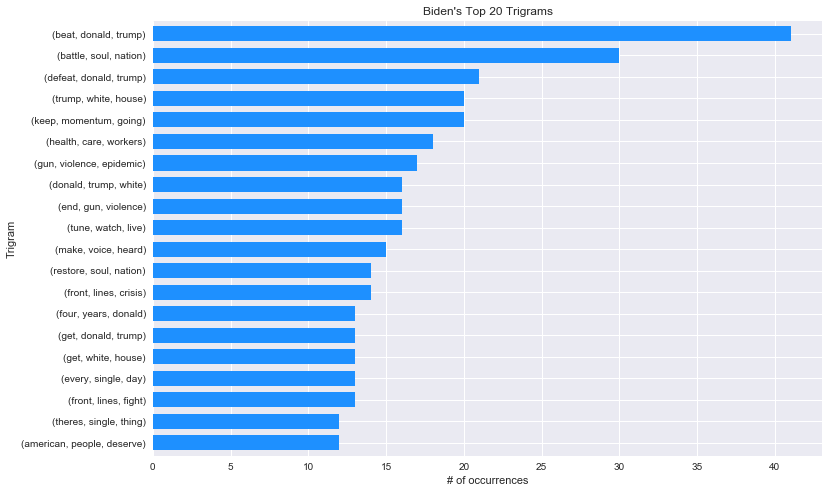

In [31]:
pd.Series(ngrams(biden_tokens, 3)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 Trigrams")
plt.ylabel('Trigram')
plt.xlabel('# of occurrences')
biden_trigrams.most_common(NUM_NGRAMS)

### 4-5 grams

[(('approval', 'rating', 'republican', 'party'), 28),
 (('whitehouse', 'live', 'press', 'briefing'), 27),
 (('live', 'press', 'briefing', 'coronavirus'), 27),
 (('press', 'briefing', 'coronavirus', 'task'), 27),
 (('briefing', 'coronavirus', 'task', 'force'), 27),
 (('whitehouse', 'live', 'press', 'briefing', 'coronavirus'), 27),
 (('live', 'press', 'briefing', 'coronavirus', 'task'), 27),
 (('press', 'briefing', 'coronavirus', 'task', 'force'), 27),
 (('radical', 'left', 'nothing', 'democrats'), 21),
 (('rating', 'republican', 'party', 'thank'), 16),
 (('approval', 'rating', 'republican', 'party', 'thank'), 16),
 (('white', 'house', 'news', 'conference'), 14),
 (('whitehouse', 'live', 'president', 'realdonaldtrump'), 12),
 (('complete', 'total', 'endorsement', 'congressman'), 11),
 (('complete', 'total', 'endorsement', 'vote'), 10),
 (('military', 'vets', 'second', 'amendment'), 9),
 (('white', 'house', 'press', 'conference'), 9),
 (('supporter', 'maga', 'agenda', 'strong'), 8),
 (('m

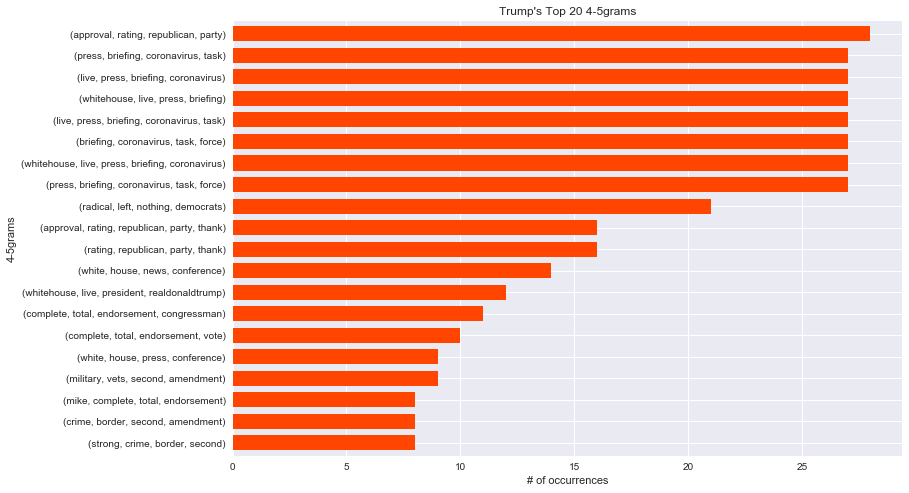

In [32]:
pd.Series(everygrams(trump_tokens, min_len= 4, max_len=5)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 4-5grams")
plt.ylabel('4-5grams')
plt.xlabel('# of occurrences')

trump_4_5_grams = FreqDist(everygrams(trump_tokens, min_len= 4, max_len=5))
trump_4_5_grams.most_common(NUM_NGRAMS)

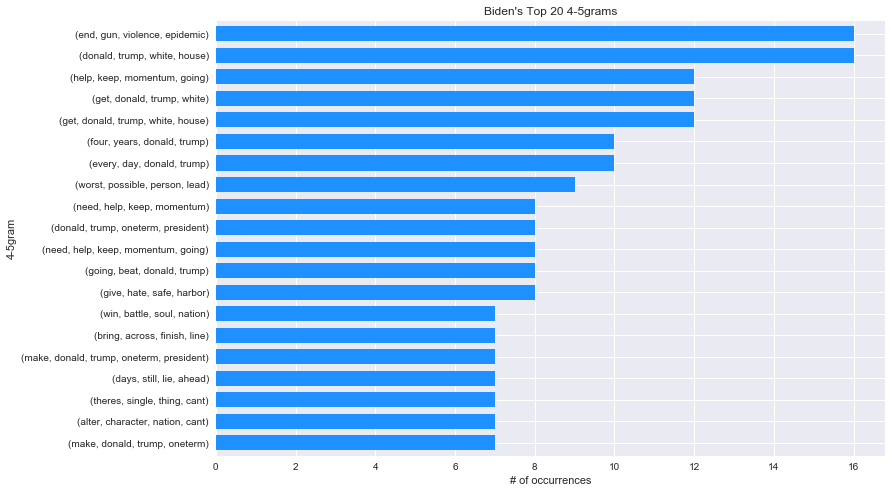

In [33]:
pd.Series(everygrams(biden_tokens, min_len= 4, max_len=5)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 4-5grams")
plt.ylabel('4-5gram')
plt.xlabel('# of occurrences')

biden_4_5_grams = FreqDist(everygrams(biden_tokens, min_len= 4, max_len=5)).most_common(NUM_NGRAMS)

From the above n-grams, it seems that Biden talks a lot about gun violence and healthcare, while Trump talks a lot about the coronavirus task force and republican party ratings. They also both mention each other a lot. Question is, how much? 

## How many times do they mention each other?

In [34]:
trump_tweets_contain_biden = trump_df[trump_df['text'].str.lower().str.contains("joe|biden")]
print(len(trump_tweets_contain_biden), "Trump tweets mention Joe Biden.")
trump_mention_biden_percent = round(100 * len(trump_tweets_contain_biden)/ len(trump_df), 2)
print("That means", trump_mention_biden_percent,  "% of Trump tweets mention Joe Biden")

227 Trump tweets mention Joe Biden.
That means 4.92 % of Trump tweets mention Joe Biden


In [35]:
biden_tweets_contain_trump = biden_df[biden_df['text'].str.lower().str.contains("trump|donald")]
print(len(biden_tweets_contain_trump), "Biden tweets mention Donald Trump.")
biden_mention_trump_percent = round(100 * len(biden_tweets_contain_trump)/ len(biden_df), 2)
print("That means", biden_mention_trump_percent,  "% of Biden tweets mention Donald Trump")

517 Biden tweets mention Donald Trump.
That means 30.85 % of Biden tweets mention Donald Trump


## How many times do they mention the coronavirus? 

In [36]:
corona_regex = "covid|corona|virus|pandemic"
biden_tweets_relate_corona = biden_df[biden_df['text'].str.lower().str.contains(corona_regex)]
print(len(biden_tweets_relate_corona))
biden_tweets_relate_corona_percent = round(100 * len(biden_tweets_relate_corona)/ len(biden_df), 2)
print("That means", biden_tweets_relate_corona_percent,  "% of Biden tweets mention coronavirus")

219
That means 13.07 % of Biden tweets mention coronavirus


In [37]:
trump_tweets_relate_corona = trump_df[trump_df['text'].str.lower().str.contains(corona_regex)]
print(len(trump_tweets_relate_corona))
trump_tweets_relate_corona_percent = round(100 * len(trump_tweets_relate_corona)/ len(trump_df), 2)
print("That means", trump_tweets_relate_corona_percent,  "% of Trump tweets mention coronavirus")

443
That means 9.6 % of Trump tweets mention coronavirus


Though Biden has less tweets about the coronavirus pandemic, this is due to Biden tweeting less than Trump overall. In relation to the rest of their tweets, Biden has a higher focus on the coronavirus pandemic than Trump. Also while only ~5% of Trump tweets mention Joe Biden, nearly 31% of Biden tweets mention Trump.

# How frequently do they tweet? Has the frequency of tweets changed as the pandemic evolved?

### Trump

In [38]:
trump_tweet_by_date = trump_df.groupby(by=trump_df['created_at'].dt.date).count()['text']
plt.plot(trump_tweet_counts_by_date.index.values, trump_tweet_by_date, color='orangered')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Number of Trump Tweets since December 31 2019')
plt.show()

NameError: name 'trump_tweet_counts_by_date' is not defined

### Biden

In [ ]:
biden_tweet_by_date = biden_df.groupby(by=biden_df['created_at'].dt.date).count()['text']
plt.plot(biden_tweet_counts_by_date.index.values, biden_tweet_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Number of Biden Tweets since December 31 2019')
plt.show()

### Both candidates on the same figure

In [ ]:
plt.plot(trump_tweet_counts_by_date.index.values, trump_tweet_by_date, 'orangered')
plt.plot(biden_tweet_counts_by_date.index.values, biden_tweet_by_date, 'dodgerblue')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Tweets since December 31 2019 ')
plt.legend(['Trump', 'Biden'])
plt.show()

From the graphs above, it seems that there are peaks and valleys. Future work would be to investigate the dates with more tweets than normal to see if those are linked with news events. Moreover, the variance in the number of tweets brings up the question if they tweet more on certain days over others?

## Do they prefer to tweet on certain days over others?

In [ ]:
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

trump_tweets_by_weekday = trump_df.groupby(by=trump_df['created_at'].dt.day_name()).count().reindex(weekdays)['text']
plt.bar(trump_tweets_by_weekday.index.values, trump_tweets_by_weekday, color='orangered')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.title('Trump Tweets by Weekday')
plt.show()

In [ ]:
biden_tweets_by_weekday = biden_df.groupby(by=biden_df['created_at'].dt.day_name()).count().reindex(weekdays)['text']
plt.bar(biden_tweets_by_weekday.index.values, biden_tweets_by_weekday, color='dodgerblue')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.title('Biden Tweets by Weekday')
plt.show()

It seems that Biden tends to tweet most during the middle of the week and tapers off on the weekend. Whereas Trump tends to tweet consistently with a tendency to tweet more on Fridays and Sundays, and less on Mondays and Thursdays.

# 5. Sentiment Analysis<a class="anchor" id="sentiment_analysis">

## Get polarity and subjectivity scores for candidate tweets

In [ ]:
# Measure subjectivity of a text. Subjectivity is in the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Use polarity as a measure for sentiment. Polarity is in the range [-1.0, 1.0] where -1 is negative and +1 is positive sentiment
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
trump_df['Subjectivity'] = trump_df['clean_text'].apply(get_subjectivity)
trump_df['Polarity'] = trump_df['clean_text'].apply(get_polarity)

biden_df['Subjectivity'] = biden_df['clean_text'].apply(get_subjectivity)
biden_df['Polarity'] = biden_df['clean_text'].apply(get_polarity)

In [ ]:
print(trump_df['Polarity'])
print(trump_df['Subjectivity'])

## Assign positive, neutral, and negative labels to tweets based on polarity

In [ ]:
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
trump_df['Sentiment'] = trump_df['Polarity'].apply(get_sentiment)
biden_df['Sentiment'] = biden_df['Polarity'].apply(get_sentiment)

In [ ]:
trump_df['Sentiment']

## Most Positive and Negative Tweets

### Trump

In [ ]:
trump_most_positive = trump_df[trump_df['Polarity'] == 1.0]
print("Trump has", len(trump_most_positive), "tweets with polarity = 1.0:\n" )

for idx, tweet in enumerate(trump_most_positive['text']):
    print(idx, tweet)
    print()

In [ ]:
trump_most_negative = trump_df[trump_df['Polarity'] == -1.0]
print("Trump has", len(trump_most_negative), "tweets with polarity = -1.0:\n" )

for idx, tweet in enumerate(trump_most_negative['text']):
    print(idx, tweet)
    print()

### Biden

In [ ]:
biden_most_positive = biden_df[biden_df['Polarity'] == 1.0]
print("Biden has", len(biden_most_positive), "tweets with polarity = 1.0:\n" )

for idx, tweet in enumerate(biden_most_positive['text']):
    print(idx, tweet)
    print()

In [ ]:
biden_most_negative = biden_df[biden_df['Polarity'] == -1.0]
print("Biden has", len(biden_most_negative), "tweets with polarity = -1.0:\n" )

for idx, tweet in enumerate(biden_most_negative['text']):
    print(idx, tweet)
    print()

## Visualize Sentiment Analysis

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(trump_df["Polarity"], trump_df["Subjectivity"], color='orangered')            
plt.title('Trump Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(biden_df["Polarity"], biden_df["Subjectivity"], color='dodgerblue') 

plt.title('Biden Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

### View the counts of positive, netural, and negative tweets

In [ ]:
trump_df['Sentiment'].value_counts()

In [ ]:
plt.title('Trump Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
trump_df['Sentiment'].value_counts().plot(kind = 'bar', color='orangered')
plt.show()

In [ ]:
biden_df['Sentiment'].value_counts()

In [ ]:
plt.title('Biden Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
biden_df['Sentiment'].value_counts().plot(kind = 'bar', color='dodgerblue')
plt.show()

## Percentage of positive/negative tweets of each candidate

### Trump

In [ ]:
positive_trump_tweets = trump_df[trump_df.Sentiment == 'Positive']
positive_trump_percent = round(len(positive_trump_tweets) / len(trump_df) * 100, 2)
print(positive_trump_percent, '% of trump tweets are positive.')

In [ ]:
# Get % of trump tweets that are neutral
neutral_trump_tweets = trump_df[trump_df.Sentiment == 'Neutral']
neutral_trump_percent = round(len(neutral_trump_tweets) / len(trump_df) * 100, 2)
print(neutral_trump_percent,'% of trump tweets are neutral.')

In [ ]:
negative_trump_tweets = trump_df[trump_df.Sentiment == 'Negative']
negative_trump_percent = round(len(negative_trump_tweets) / len(trump_df) * 100, 2)
print(negative_trump_percent, '% of trump tweets are negative.')

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sentiments = ['positive', 'neutral', 'negative']
percentages = [positive_trump_percent, neutral_trump_percent, negative_trump_percent]
explode = [0.1, 0, 0]

fig1, ax1 = plt.subplots()
pie_colors = ['mediumspringgreen', 'gainsboro', 'salmon']
ax1.pie(percentages, explode=explode, labels=sentiments, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pie_colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Trump Sentiments")
plt.show()

### Biden

In [ ]:
positive_biden_tweets = biden_df[biden_df.Sentiment == 'Positive']
positive_biden_percent = round(len(positive_biden_tweets) / len(biden_df) * 100, 2)
print(positive_biden_percent, '% of biden tweets are positive.')

In [ ]:
neutral_biden_tweets = biden_df[biden_df.Sentiment == 'Neutral']
neutral_biden_percent = round(len(neutral_biden_tweets) / len(biden_df) * 100, 2)
print(neutral_biden_percent, '% of biden tweets are neutral.')

In [ ]:
negative_biden_tweets = biden_df[biden_df.Sentiment == 'Negative']
negative_biden_percent = round(len(negative_biden_tweets) / len(biden_df) * 100, 2)
print(negative_biden_percent, '% of biden tweets are negative.')

In [ ]:
percentages = [positive_biden_percent, neutral_biden_percent, negative_biden_percent]

fig2, ax2 = plt.subplots()
ax2.pie(percentages, explode=explode, labels=sentiments, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pie_colors)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Biden Sentiments")
plt.show()

Here we observe a result I was not expecting: Biden's tweets are more polarizing than Trump's. 54.06% of Biden tweets are positive and 23.69% of them are negative, while 52.55% of Trump's tweets are positive and 21.33% are negative. 

## Did their sentiments change as the pandemic evolved?

### Trump

In [ ]:
trump_polarity_by_date = trump_df.groupby(by=trump_df['created_at'].dt.date).mean()['Polarity']
plt.plot(trump_polarity_by_date.index.values, trump_polarity_by_date, color='orangered')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Trump Average Polarity since December 31 2019')
plt.show()

### Biden

In [ ]:
biden_polarity_by_date = biden_df.groupby(by=biden_df['created_at'].dt.date).mean()['Polarity']
plt.plot(biden_polarity_by_date.index.values, biden_polarity_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Biden Average Polarity since December 31 2019')
plt.show()

### Both on one plot

In [ ]:
plt.plot(trump_polarity_by_date.index.values, trump_polarity_by_date, color='orangered')
plt.plot(biden_polarity_by_date.index.values, biden_polarity_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Average Polarity since December 31 2019')
plt.legend(['Trump', 'Biden'])
plt.show()

# 6. Topic Modeling with [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)<a class="anchor" id="topic_modeling">

In the literature, it seems that the biterm topic model (BTM) outperforms the traditional LDA algorithm for shorter text documents such as tweets [[source](https://www.cs.toronto.edu/~jstolee/projects/topic.pdf), [source](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.402.4032&rep=rep1&type=pdf)].

Future work can include comparing the results of these two models and seeing if we observe the suggested improvements. 

# Peprocess data for topic modelling
Remove words with fewer than three characters, perform lemmatization and stemming, include custom stopwords for each candidate to improve topic modelling. 

In [ ]:
# Define functions for topic model preprocessing
# TODO: look at token and find it's POS tag and then pass that into lemmatize, else by default it treats
# Every token as a noun, or as a verb if i leave it like this
# https://stackoverflow.com/questions/25534214/nltk-wordnet-lemmatizer-shouldnt-it-lemmatize-all-inflections-of-a-word

custom_trump_stopwords = ['realdonaldtrump', 'great', 'pass']
def stem_and_lemmatize(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text))


def preprocess_tokens(tokens):
    result = []
    for token in tokens:
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in custom_trump_stopwords:
            result.append(stem_and_lemmatize(token))
    return result

In [ ]:
trump_df['processed_tokens'] = trump_df['tokens'].apply(preprocess_tokens)
biden_df['processed_tokens'] = biden_df['tokens'].apply(preprocess_tokens)

Before preprocessing:

In [ ]:
trump_df['tokens'].head(20)

After preprocessing:

In [ ]:
trump_df['processed_tokens'].head(20)

In [ ]:
trump_processed_tokens = trump_df['processed_tokens']
biden_processed_tokens = biden_df['processed_tokens']

## Create bags of words on the datasets

In [ ]:
# Look at and learn gensim later, for now get the code working quickly and read more later.
trump_dictionary = gensim.corpora.Dictionary(trump_processed_tokens)
biden_dictionary = gensim.corpora.Dictionary(biden_processed_tokens)

In [ ]:
print("Number of words in Trump dictionary:", len(trump_dictionary))
print("Number of words in Biden dictionary:", len(biden_dictionary))

In [ ]:
# Filter out tokens that appear in less than 10 tweets or more than half the tweets
trump_dictionary.filter_extremes(no_below=10, no_above=0.5)
biden_dictionary.filter_extremes(no_below=10, no_above=0.5)

In [ ]:
print("Number of words in Trump dictionary after filtering extremes:", len(trump_dictionary))
print("Number of words in Biden dictionary after filtering extremes:", len(biden_dictionary))

In [ ]:
trump_bow_corpus = [trump_dictionary.doc2bow(doc) for doc in trump_processed_tokens]
biden_bow_corpus = [biden_dictionary.doc2bow(doc) for doc in biden_processed_tokens]

# Improve bag of words with TF-IDF
We can perform topic modelling directly with our bag of words, but we can further improve it first by incorporating [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). 

In [ ]:
trump_tfidf = models.TfidfModel(trump_bow_corpus)
biden_tfidf = models.TfidfModel(biden_bow_corpus)

trump_tfidf_corpus = trump_tfidf[trump_bow_corpus]
biden_tfidf_corpus = biden_tfidf[biden_bow_corpus]

## Train the LDA model

# TODO: TRY DIFF num passes, look at documentation, do diff num topics, words, then visualize and see if clusters are similar. if similar => use less...

In [ ]:
NUM_WORKERS = 3
NUM_PASSES = 15
trump_lda_3 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=3, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_3.save('trump_lda/trump_lda_3.gensim')

In [ ]:
trump_lda_5 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=5, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_5.save('trump_lda/trump_lda_5.gensim')

In [ ]:
trump_lda_7 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=7, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_7.save('trump_lda/trump_lda_7.gensim')

In [ ]:
trump_lda_10 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=10, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_10.save('trump_lda/trump_lda_10.gensim')

In [ ]:
biden_lda_3 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=3, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_3.save('biden_lda/biden_lda_3.gensim')

In [ ]:
biden_lda_5 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=5, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_5.save('biden_lda/biden_lda_5.gensim')

In [ ]:
biden_lda_7 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=7, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_7.save('biden_lda/biden_lda_7.gensim')

In [ ]:
biden_lda_10 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=10, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_10.save('biden_lda/biden_lda_10.gensim')

## Look at words in each topic with their relative weights

### Trump

In [ ]:
for idx, topic in trump_lda_5.print_topics(num_words=7):
    print("Topic %d:" %idx, topic)

### Biden

In [ ]:
for idx, topic in biden_lda_5.print_topics(num_words=7):
    print("Topic %d:" %idx, topic)

## Test models on a new unseen tweet

### Trump

In [ ]:
# TODO: Should fix this cuz not properly preprocessed ...; make proper preprocess functions... 
unseen_trump_tweet = 'Big China Virus breakouts all over the World, including nations which were thought to have done a great job. The Fake News doesn’t report this. USA will be stronger than ever before, and soon!'
trump_bow_vector = trump_dictionary.doc2bow(preprocess_tokens(remove_url_punctuation(unseen_trump_tweet)))
test = preprocess_tokens(unseen_trump_tweet)
print(test)

for index, score in sorted(trump_lda_5[trump_bow_vector], key=lambda t: t[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, trump_lda_5.print_topic(index, topn=7)))

## Biden

# Visualize topics

In [ ]:
# Uses great a lot, potentialy remove great specifically for topic modelling
# label the nuances of using different preprocessing steps for different analyses e.g want to keep
# great in for sentiment analysis, but since trump uses it so much, remove it for topic modelling
# since it's essentially a stopword that doesn't add to the semantic meaning.

In [ ]:
# Cleaning your data: adding stop words that are too frequent in your topics and re-running your model is a common step. 
# Keeping only nouns and verbs, removing templates from texts, testing different cleaning methods iteratively will improve your topics. 
# Be prepared to spend some time here.

# Another classic preparation step is to use only nouns and verbs using POS tagging (POS: Part-Of-Speech).

# # Filtering words that appear in at least 3 (or more) documents is a good way to remove rare words that will not be relevant in topics.

# https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc 
# Take the pyldavis and the topic and doc freq. 

In [ ]:
# vis = pyLDAvis.gensim.prepare(topic_model=trump_lda_bow_model_5, corpus=trump_bow_corpus, dictionary=trump_dictionary)
# pyLDAvis.enable_notebook()
# pyLDAvis.display(vis)

# Topic 4 is fake news, can manually label that as fake news lol 
# When we have 5 or 10 topics, we can see certain topics are clustered together, this indicates the similarity between topics. What a a nice way to visualize what we have done thus far!

In [ ]:
vis = pyLDAvis.gensim.prepare(topic_model=trump_lda_5, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
pyLDAvis.display(vis)

In [ ]:
# lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
# lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
# pyLDAvis.display(lda_display3)

# 7. Classification<a class="anchor" id="classification">

In [ ]:
def print_classification_results(predictions, y_test, model_name):
    print( model_name, "Accuracy Score:", accuracy_score(predictions, y_test)*100)
    print(model_name, "Classification Report: \n", classification_report(y_test,predictions))
    conf_mat = confusion_matrix(y_test, predictions)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Biden', 'Trump'], yticklabels=['Biden','Trump'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Candidate')
    plt.ylabel('True Candidate')
    plt.show()

In [ ]:
# Assign numeric labels to the classes, biden:0, trump:1
biden_df['label'] = 0
trump_df['label'] = 1

In [ ]:
# Merge their two dataframes together into one training dataframe. 
train_df = pd.concat([trump_df, biden_df])

In [ ]:
# Use tokens which are not stemmed and lemmatized. Using stemmed and lemmatized tokens led to decreased prediction accuracy.
# Train on the tf_idf vector of our tokens

train_df['training_text'] = train_df['tokens'].apply(TreebankWordDetokenizer().detokenize) 
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(train_df['training_text'])
y = train_df['label']

In [ ]:
# Try a handful of classifiers that should be good for text classification

classifiers = [
    LogisticRegression(random_state=0),
    MultinomialNB(),
    svm.SVC(kernel='linear'),
    SGDClassifier(),
    AdaBoostClassifier(),
    MLPClassifier(hidden_layer_sizes=(10,), random_state=0),
    RandomForestClassifier(n_estimators=150, random_state=0)
]

# Evaluate with 10-fold cross validation
CV = 10
classifiers_df = pd.DataFrame(index=range(CV * len(classifiers)))
rows = []

for clf in classifiers:
    print('Training', clf)
    clf_name = clf.__class__.__name__
    accuracies = cross_val_score(clf, X, y, scoring='accuracy', cv=CV, n_jobs=-1)
    for idx, accuracy in enumerate(accuracies):
        rows.append((clf_name, idx, accuracy))
    
classifiers_df = pd.DataFrame(rows, columns=['classifier_name', 'fold', 'accuracy'])
classifiers_df

In [ ]:
classifiers_df.groupby('classifier_name').mean().drop(columns=['fold']).sort_values(['accuracy'], ascending=False)

We have multiple classifiers that score very highly. Let's use the top three together in a voting classifier to see if we can improve the accuracy even more. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,train_df['label'], test_size=0.2)

clf1 = MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
clf2 = SGDClassifier()
clf3 = svm.SVC(kernel='linear')

eclf = VotingClassifier(estimators=[('mlp', clf1), ('sgd', clf2), ('svm', clf3)], n_jobs=-1)

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

In [ ]:
y_pred = eclf.predict(X_test)
print_classification_results(y_pred, y_test, "Voting Classifier")

Able to slighly improve accuracy from ~93% to ~95% by using the top 3 individual classifiers together in a voting ensemble. 

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show() 